# Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

<br>
<br>

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

<br>
<br>

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

<br>
<br>

There are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

<br>
<br>
 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

<br>
<br>

### Goals of the Case Study
There are quite a few goals for this case study.

1. Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
2. There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Reading the Data

In [75]:
df=pd.read_csv('Leads.csv',na_values='Select') #na_values='Select' takes values=='Select' as null values

In [76]:
df.shape

(9240, 37)

The dataset contains 9240 rows and 37 columns.

In [77]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# Data Cleaning

In [78]:
#checking for null values
cl=round(df.isnull().sum()/len(df)*100,2)
print(cl)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

We will drop the columns with more than 25% missing values since imputing 25% of the data with the same value does not make sense. Imputing 25% implies giving the same values to 2310 observations which might make the data biased. We will still perform EDA on the columns to be dropped with upto approximately 50% missing values to know the general trend.

## EDA on columns to be dropped

In [79]:
#storing columns with more than 25% and less than 50% null values
less50=df.columns[(cl>25) & (cl<50)]
less50

Index(['Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'City',
       'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score'],
      dtype='object')

In [80]:
df['Converted'].sum()/len(df)*100

38.53896103896104

Hence, we notice that the conversion rate is approximately 38.5%. Thus, we checking the data on percentage scale

In [81]:
#defining a function for plotting the categorical columns with % wise with respect to conversion.
def pv(col):
    pvdf=pd.pivot_table(index=col,columns='Converted',values='TotalVisits',aggfunc='count',data=df,fill_value=0)
    pvdf['Sum']=pvdf.sum(axis=1)
    for cols in list(pvdf.columns):
     pvdf[cols]=pvdf[cols]/len(df)*100
    pvdf=pvdf.drop('Sum',axis=1)
    pvdf=pvdf.stack().reset_index().rename(columns={0:'Percentage Value'})
    plt.figure(figsize=(5,5))
    sns.barplot(x=col,y='Percentage Value',hue='Converted',data=pvdf)
    plt.xticks(rotation=90)

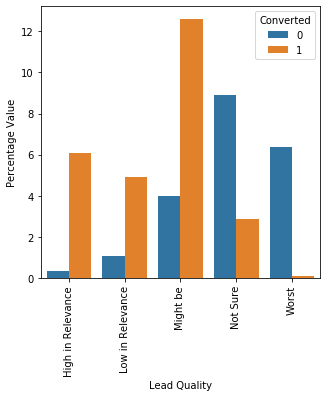

In [82]:
pv('Lead Quality')

Thus, we observe that 'Lead Quality' is an important variable to determine the conversion due to more observed conversions and higher variance. Hence, we do not drop this variable.

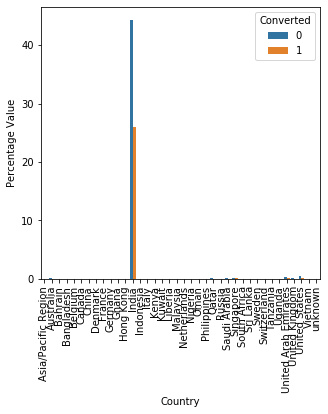

In [83]:
pv('Country')

Most of the observations have India as country. Hence, the 'Country' variable would not act as an indicator variable.

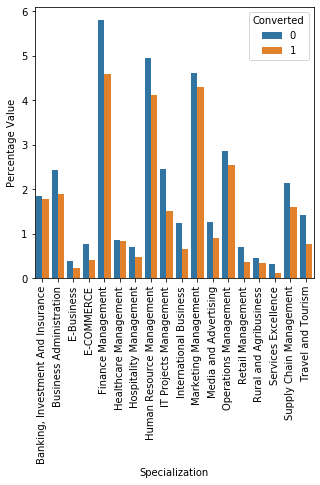

In [84]:
#checking 'Specialization'
pv('Specialization')

Thus, we observe that Banking, Investment and Insurance and Healthcare Management have a slightly higher chance to convert. We store the missing values as 'others' so that we have the data for the 'Specialization' since it has a huge variance.

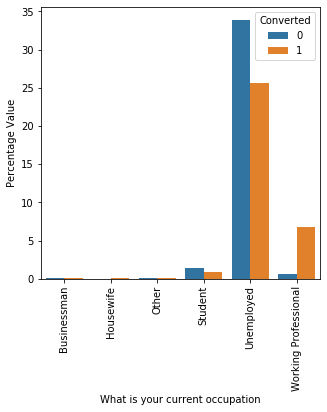

In [85]:
pv('What is your current occupation')

In [86]:
df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

This variable looks highly skewed because of the huge number of unemployed occupation. Hence, we drop this variable.

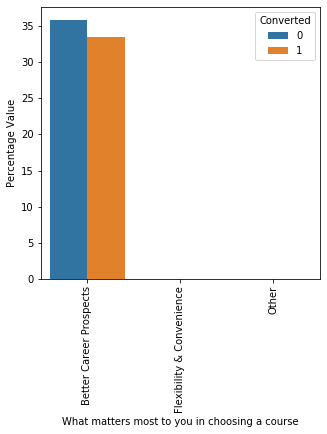

In [87]:
pv('What matters most to you in choosing a course')

Most of the entries in this column has the Better Career Prospects value. Thus, this column does not act as a major indicator.

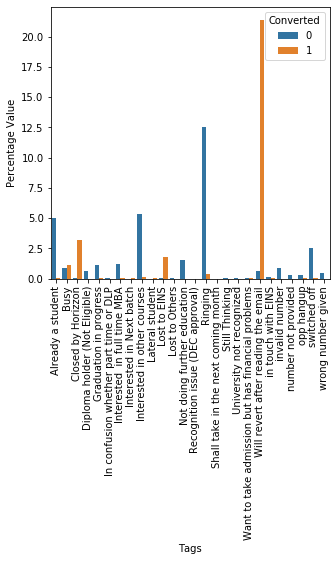

In [88]:
pv('Tags')

We observe that the tag 'Will revert after reading the email' has a higher chance of conversion when compared to 'Ringing' and 'Interested in other courses'. We will replace the missing values with 'others' so that we do not lose the data.

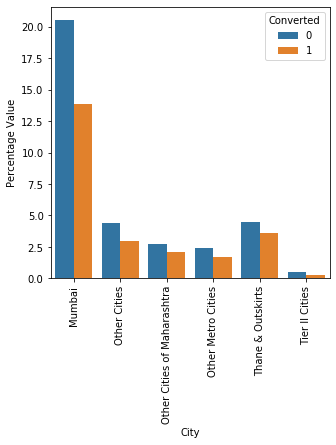

In [89]:
pv('City')

All the observation have similar conversion rates and the cities are around Mumbai. Thus, this variable does not act as an indicator.

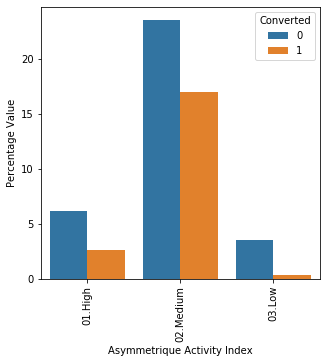

In [90]:
pv('Asymmetrique Activity Index')

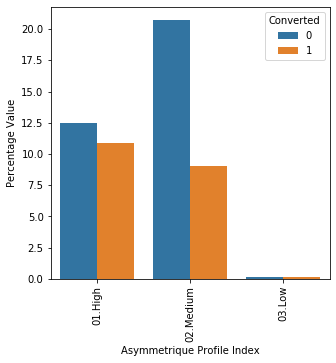

In [91]:
pv('Asymmetrique Profile Index')

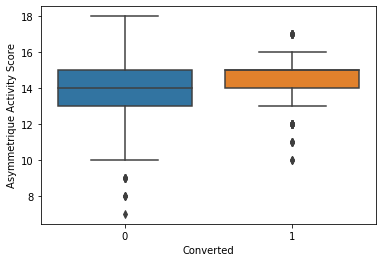

In [92]:
sns.boxplot(x='Converted',y='Asymmetrique Activity Score',data=df)

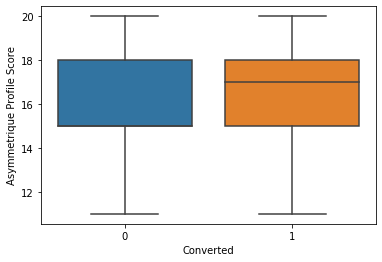

In [93]:
sns.boxplot(x='Converted',y='Asymmetrique Profile Score',data=df)

Hence, we observe that there is not much difference with respect to conversion for the following four variables:  'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score' and 'Asymmetrique Profile Score'.

#### Dropping the columns with more than 25% null values.

In [94]:
cols_to_drop=list(df.loc[:,list(df.isnull().sum()/len(df)*100>25)].columns)
cols_to_drop

['Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags',
 'Lead Quality',
 'Lead Profile',
 'City',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [95]:
#dropping columns with more than 25% null values while keeping the variables with higher variation
cols_to_drop=list(df.loc[:,list(df.isnull().sum()/len(df)*100>25)].columns)
cols_to_drop.remove('Specialization') 
cols_to_drop.remove('Tags')
cols_to_drop.remove('Lead Quality')
df=df.drop(cols_to_drop,axis=1)

In [96]:
#replacing the null values with Others
df.loc[df['Specialization'].isnull(),'Specialization']='Others'
df.loc[df['Tags'].isnull(),'Tags']='Others'
df.loc[df['Lead Quality'].isnull(),'Lead Quality']='Others'

In [97]:
#checking for null values
print(round(df.isnull().sum()/len(df)*100,2))

Prospect ID                                 0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
Specialization                              0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Tags                

Hence, we observe that most of the columns have around 1% missing values. Thus, we remove the null values.

In [98]:
ol=len(df)

In [99]:
ol

9240

In [100]:
df=df.dropna()

In [101]:
len(df)

9074

In [102]:
(ol-len(df))/ol

0.017965367965367966

In [103]:
df.shape

(9074, 27)

Thus, we lost only 1.8% of the dataset. We still have 9074 rows and 24 columns with us.

# EDA (Understanding the Data)

In [104]:
#dropping Prospect ID since it is an ID column.
df=df.drop('Prospect ID',axis=1)

#setting lead Number as index
df=df.set_index('Lead Number')

In [105]:
#looking at the statistical aspects
df.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.378554,3.456028,482.887481,2.370151
std,0.485053,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,11.000000,1.000000
50%,0.000000,3.000000,246.000000,2.000000
75%,1.000000,5.000000,922.750000,3.200000
max,1.000000,251.000000,2272.000000,55.000000


Thus, the **Conversion Rate** is **37.9%** or approximately **38%**. 

In [106]:
#checking the type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 660737 to 579533
Data columns (total 25 columns):
Lead Origin                                 9074 non-null object
Lead Source                                 9074 non-null object
Do Not Email                                9074 non-null object
Do Not Call                                 9074 non-null object
Converted                                   9074 non-null int64
TotalVisits                                 9074 non-null float64
Total Time Spent on Website                 9074 non-null int64
Page Views Per Visit                        9074 non-null float64
Last Activity                               9074 non-null object
Specialization                              9074 non-null object
Search                                      9074 non-null object
Magazine                                    9074 non-null object
Newspaper Article                           9074 non-null object
X Education Forums                       

### Checking Outliers and Treating them

In [107]:
# checking for outliers in the continuous variables

num_df=df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_df.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
95%,10.000000,1557.000000,6.000000
99%,17.000000,1839.000000,9.000000


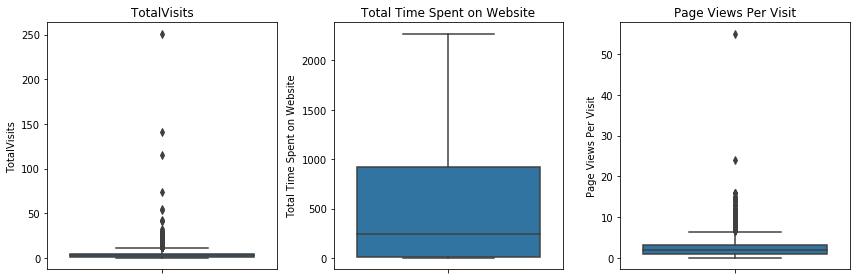

In [108]:
#checking outliers using boxplots
plt.figure(figsize=(12,4))
i=1
for col in num_df.columns:
    plt.subplot(1,3,i)
    sns.boxplot(y=num_df[col])
    plt.title(col)
    i+=1

plt.tight_layout()
plt.show()

Thus, we observe the presence of outliers and we remove them using IQR method.

In [109]:
#dropping outliers in Total Visits and Page Views Per Visit

q1=df['TotalVisits'].quantile(0.25)
q3=df['TotalVisits'].quantile(0.75)
iqr=q3-q1
df=df.loc[df['TotalVisits']<(q3+1.5*iqr)]

q1=df['Total Time Spent on Website'].quantile(0.25)
q3=df['Total Time Spent on Website'].quantile(0.75)
iqr=q3-q1
df=df.loc[df['Total Time Spent on Website']<(q3+1.5*iqr)]

q1=df['Page Views Per Visit'].quantile(0.25)
q3=df['Page Views Per Visit'].quantile(0.75)
iqr=q3-q1
df=df.loc[df['Page Views Per Visit']<(q3+1.5*iqr)]

df.shape

(8213, 25)

In [110]:
# checking for outliers in the continuous variables

num_df=df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_df.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,8213.000000,8213.000000,8213.000000
mean,2.663339,463.751005,1.961851
std,2.297951,540.360459,1.533552
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,2.000000,228.000000,2.000000
75%,4.000000,881.000000,3.000000
90%,5.000000,1357.800000,4.000000
95%,7.000000,1541.400000,5.000000
99%,10.000000,1816.000000,5.000000


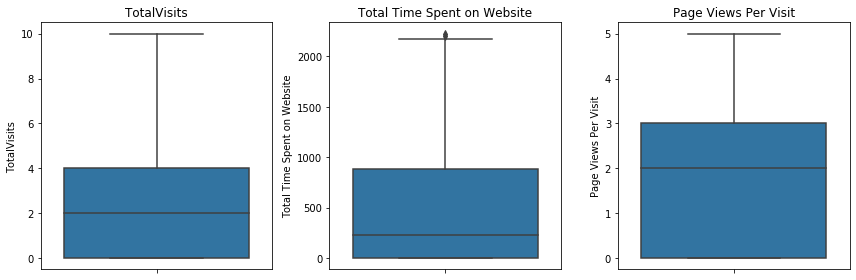

In [111]:
#checking outliers using boxplots
plt.figure(figsize=(12,4))
i=1
for col in num_df.columns:
    plt.subplot(1,3,i)
    sns.boxplot(y=num_df[col])
    plt.title(col)
    i+=1

plt.tight_layout()
plt.show()

Thus, we observe that the outliers have been removed.

In [112]:
#checking categorical columns
catcol=list(df.columns)
catcol.remove('TotalVisits')
catcol.remove('Total Time Spent on Website')
catcol.remove('Page Views Per Visit')

In [113]:
len(catcol)

22

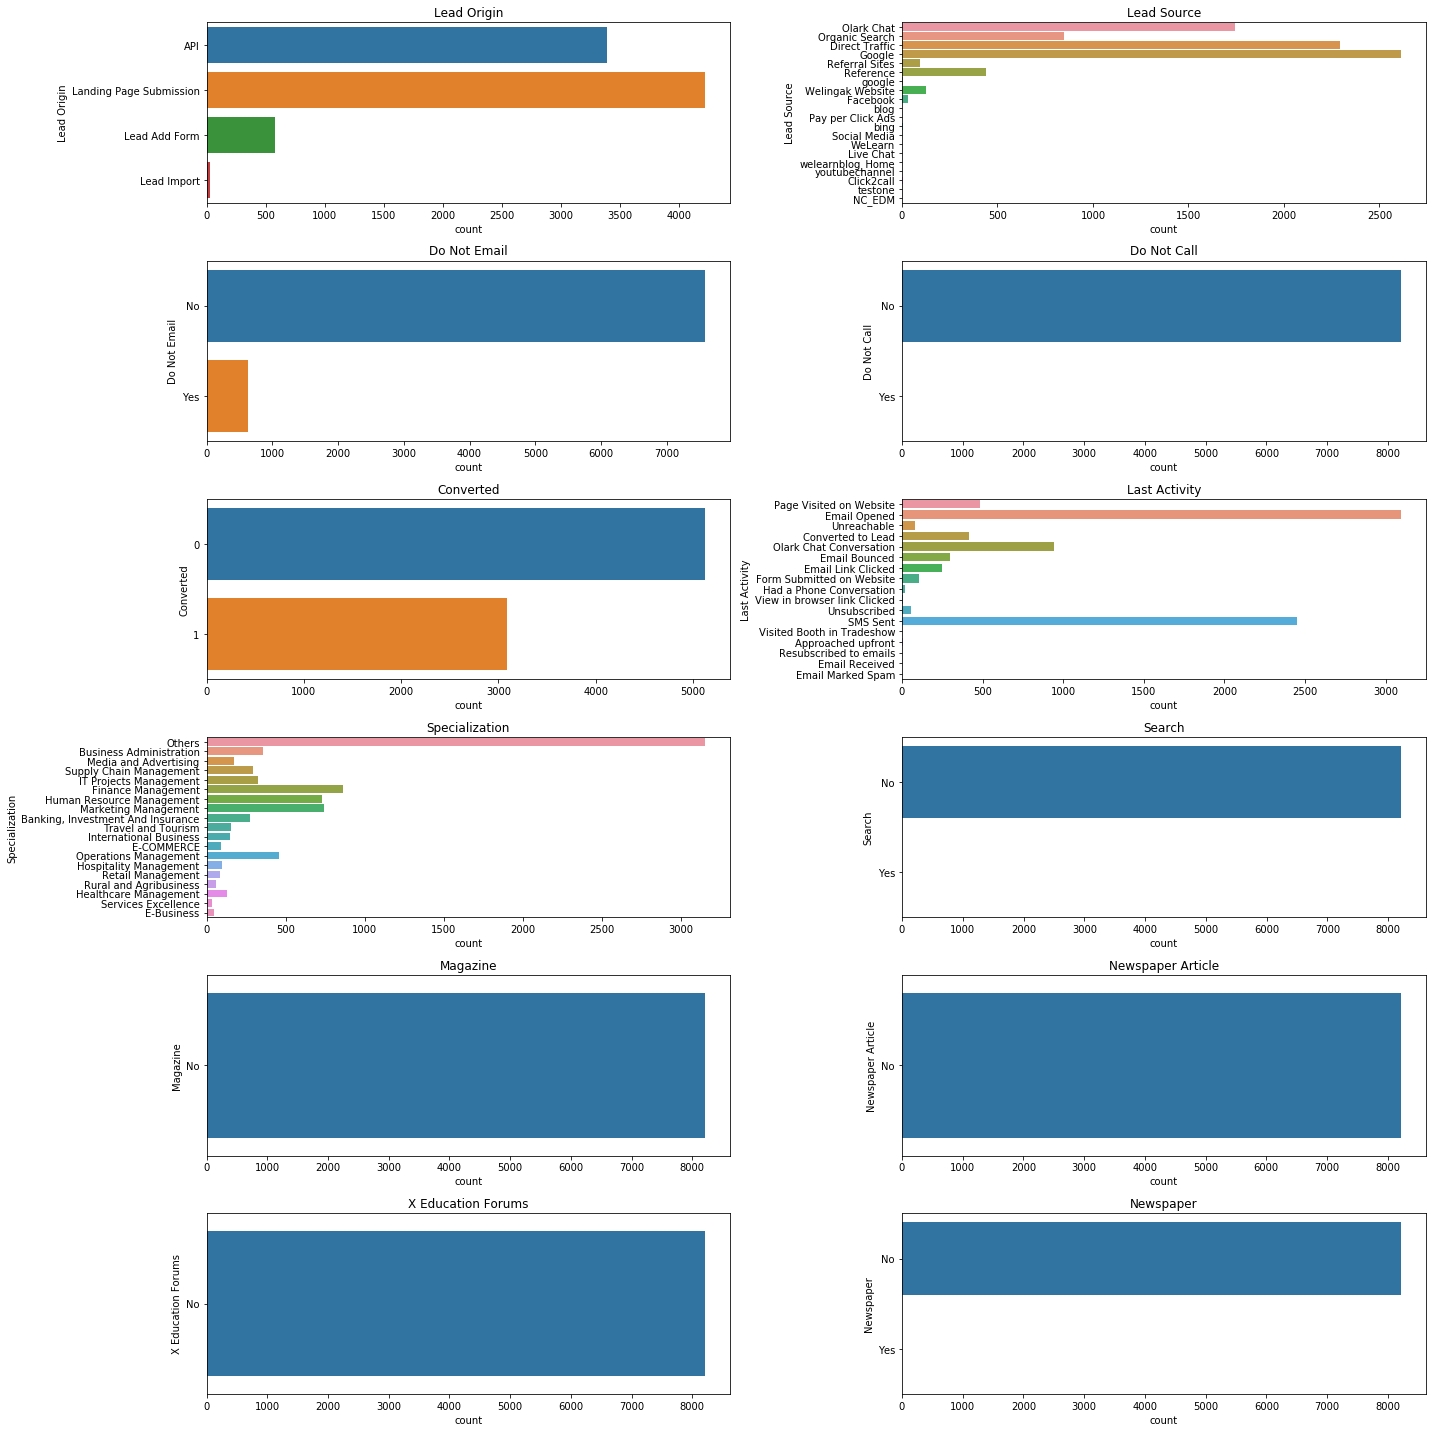

In [114]:
#plotting categorical columns
i=1
plt.figure(figsize=(20,20))
for j in range(12):
    plt.subplot(6,2,i)
    sns.countplot(y=df[catcol[j]])
    plt.title(catcol[j])
    i+=1
    
plt.tight_layout()
plt.show()

We replace google with Google in Lead Source since they are the same values.

In [115]:
df=df.replace('google','Google')
df['Lead Source'].value_counts()

Google               2616
Direct Traffic       2295
Olark Chat           1742
Organic Search        846
Reference             440
Welingak Website      128
Referral Sites         96
Facebook               30
bing                    6
Click2call              3
Live Chat               2
Social Media            2
Pay per Click Ads       1
testone                 1
youtubechannel          1
WeLearn                 1
NC_EDM                  1
welearnblog_Home        1
blog                    1
Name: Lead Source, dtype: int64

We remove all the categorical levels having very low counts since they might act as categorical outliers.

In [116]:
#dropping all rows with less than 30 counts
vc=df['Lead Source'].value_counts()
ot=list(vc.loc[vc<10].index)
for el in ot:
    df=df.loc[df['Lead Source']!=el]
    
df['Lead Source'].value_counts()

Google              2616
Direct Traffic      2295
Olark Chat          1742
Organic Search       846
Reference            440
Welingak Website     128
Referral Sites        96
Facebook              30
Name: Lead Source, dtype: int64

In [117]:
df.shape

(8193, 25)

In [118]:
df['Last Activity'].value_counts()

Email Opened                    3084
SMS Sent                        2450
Olark Chat Conversation          940
Page Visited on Website          479
Converted to Lead                416
Email Bounced                    296
Email Link Clicked               251
Form Submitted on Website        108
Unreachable                       81
Unsubscribed                      53
Had a Phone Conversation          20
Approached upfront                 5
View in browser link Clicked       4
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [119]:
#dropping all rows with less than 50 counts
vc=df['Last Activity'].value_counts()
ot=list(vc.loc[vc<50].index)
for el in ot:
    df=df.loc[df['Last Activity']!=el]
    
df['Last Activity'].value_counts()

Email Opened                 3084
SMS Sent                     2450
Olark Chat Conversation       940
Page Visited on Website       479
Converted to Lead             416
Email Bounced                 296
Email Link Clicked            251
Form Submitted on Website     108
Unreachable                    81
Unsubscribed                   53
Name: Last Activity, dtype: int64

In [120]:
df.shape

(8158, 25)

In [121]:
df['Specialization'].value_counts()

Others                               3138
Finance Management                    858
Marketing Management                  735
Human Resource Management             720
Operations Management                 451
Business Administration               351
IT Projects Management                324
Supply Chain Management               291
Banking, Investment And Insurance     275
Media and Advertising                 172
Travel and Tourism                    150
International Business                150
Healthcare Management                 127
Hospitality Management                100
E-COMMERCE                             91
Retail Management                      82
Rural and Agribusiness                 60
E-Business                             48
Services Excellence                    35
Name: Specialization, dtype: int64

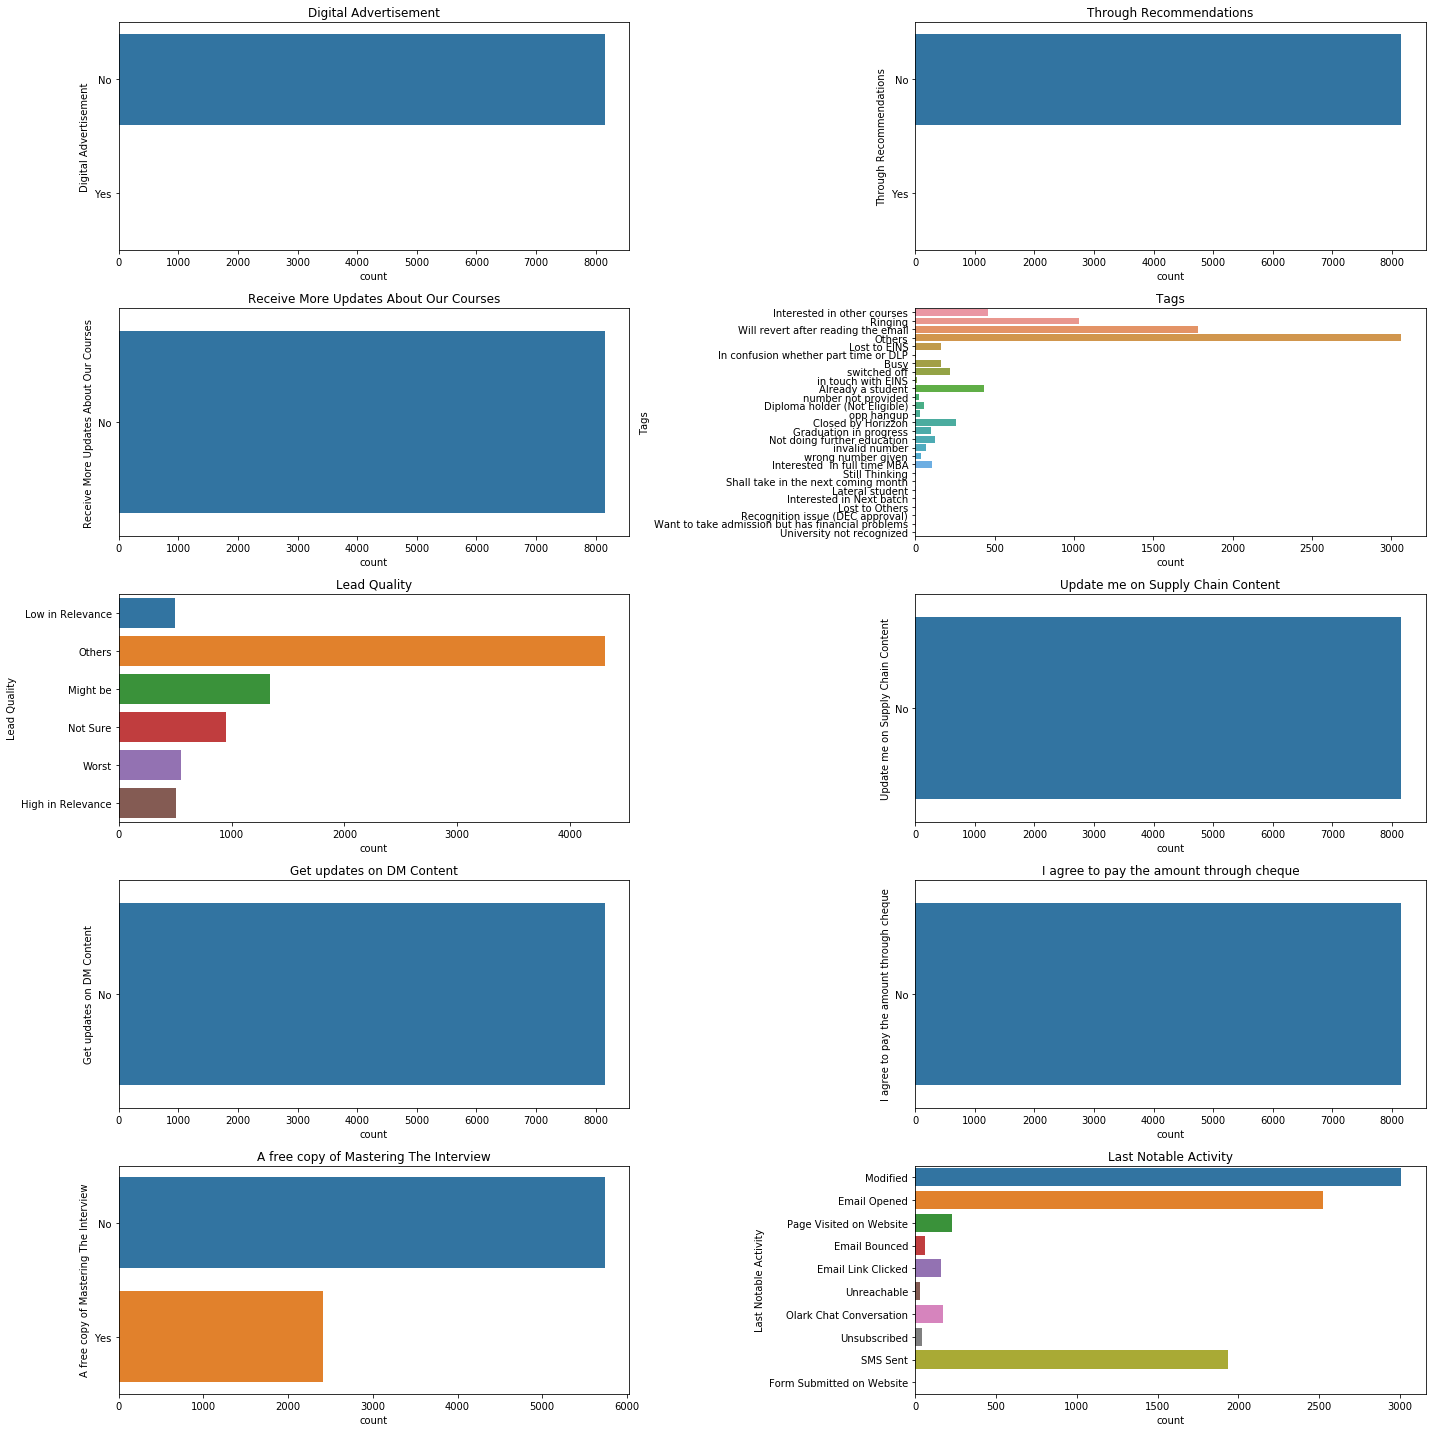

In [122]:
plt.figure(figsize=(20,20))
i=1
for j in range(12,22):
    plt.subplot(5,2,i)
    sns.countplot(y=df[catcol[j]])
    plt.title(catcol[j])
    i+=1
    
plt.tight_layout()
plt.show()

In [123]:
df['Tags'].value_counts()

Others                                               3063
Will revert after reading the email                  1780
Ringing                                              1032
Interested in other courses                           460
Already a student                                     435
Closed by Horizzon                                    257
switched off                                          217
Busy                                                  162
Lost to EINS                                          160
Not doing further education                           128
Interested  in full time MBA                          106
Graduation in progress                                100
invalid number                                         67
Diploma holder (Not Eligible)                          57
wrong number given                                     38
opp hangup                                             28
number not provided                                    23
in touch with 

In [124]:
#dropping all rows with less than 50 counts
vc=df['Tags'].value_counts()
ot=list(vc.loc[vc<50].index)
for el in ot:
    df=df.loc[df['Tags']!=el]
    
df['Tags'].value_counts()

Others                                 3063
Will revert after reading the email    1780
Ringing                                1032
Interested in other courses             460
Already a student                       435
Closed by Horizzon                      257
switched off                            217
Busy                                    162
Lost to EINS                            160
Not doing further education             128
Interested  in full time MBA            106
Graduation in progress                  100
invalid number                           67
Diploma holder (Not Eligible)            57
Name: Tags, dtype: int64

In [125]:
df.shape

(8024, 25)

In [126]:
df['Last Notable Activity'].value_counts()

Modified                     2957
Email Opened                 2494
SMS Sent                     1898
Page Visited on Website       226
Olark Chat Conversation       172
Email Link Clicked            154
Email Bounced                  54
Unsubscribed                   39
Unreachable                    29
Form Submitted on Website       1
Name: Last Notable Activity, dtype: int64

In [127]:
#dropping all rows with value counts less than 30
vc=df['Last Notable Activity'].value_counts()
ot=list(vc.loc[vc<30].index)
for el in ot:
    df=df.loc[df['Last Notable Activity']!=el]
    
df['Last Notable Activity'].value_counts()

Modified                   2957
Email Opened               2494
SMS Sent                   1898
Page Visited on Website     226
Olark Chat Conversation     172
Email Link Clicked          154
Email Bounced                54
Unsubscribed                 39
Name: Last Notable Activity, dtype: int64

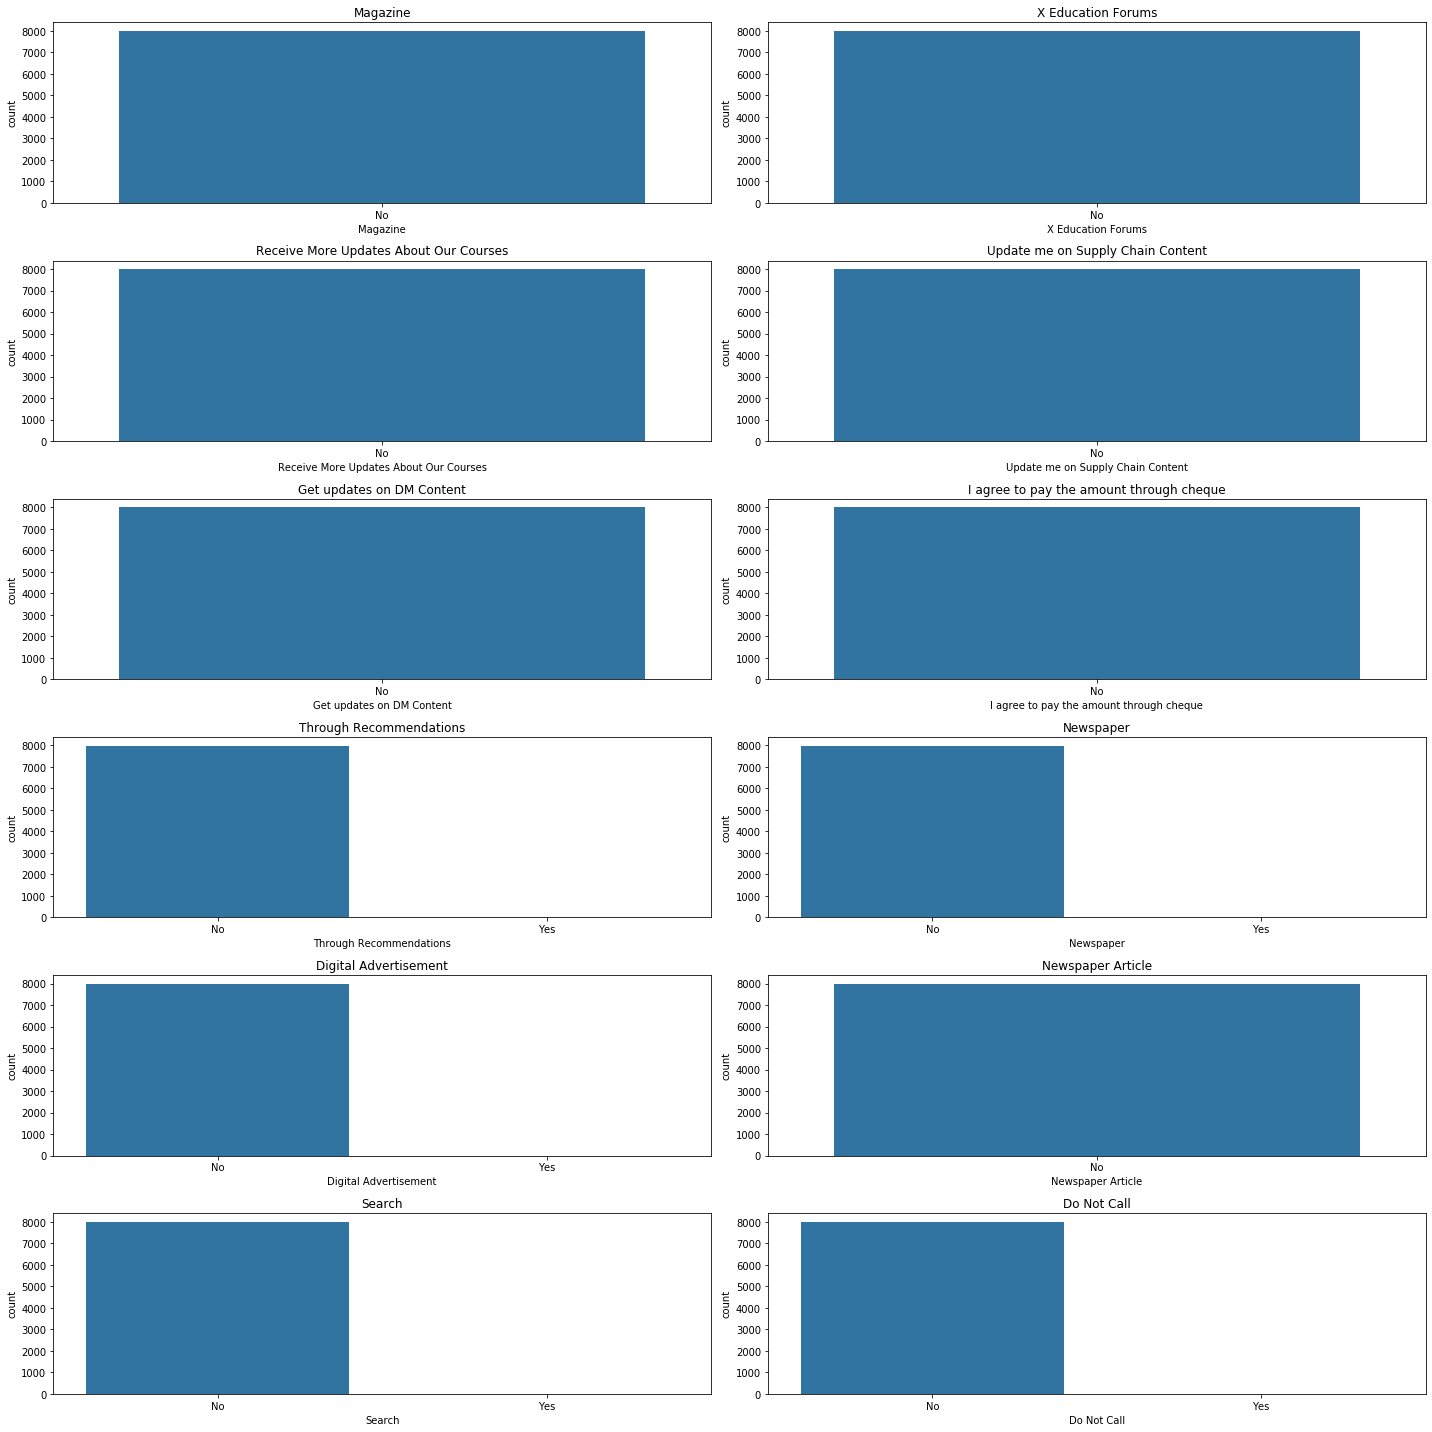

In [128]:
lv=['Magazine','X Education Forums','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','Through Recommendations','Newspaper','Digital Advertisement','Newspaper Article','Search','Do Not Call']
plt.figure(figsize=(20,20))
i=1
for col in lv:
    plt.subplot(6,2,i)
    sns.countplot(x=df[col])
    plt.title(col)
    i+=1
    
plt.tight_layout()
plt.show()

Thus, we observe that Magazine, X Education Forums, Receive More Updates Abour Our Courses, Update me on Supply Chain Content, Get updates on DM Content and I agree to pay the amount through cheque have only No values. Thus, these columns would not act as variables of difference among the observations. Hence, we drop them.


We also drop the columns in which almost 99% of the values are the same, for example, 'Through Recommendations'.

In [129]:
df=df.drop(['Magazine','X Education Forums','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','Through Recommendations','Newspaper','Digital Advertisement','Newspaper Article','Search','Do Not Call'],axis=1)

In [130]:
df.shape

(7994, 13)

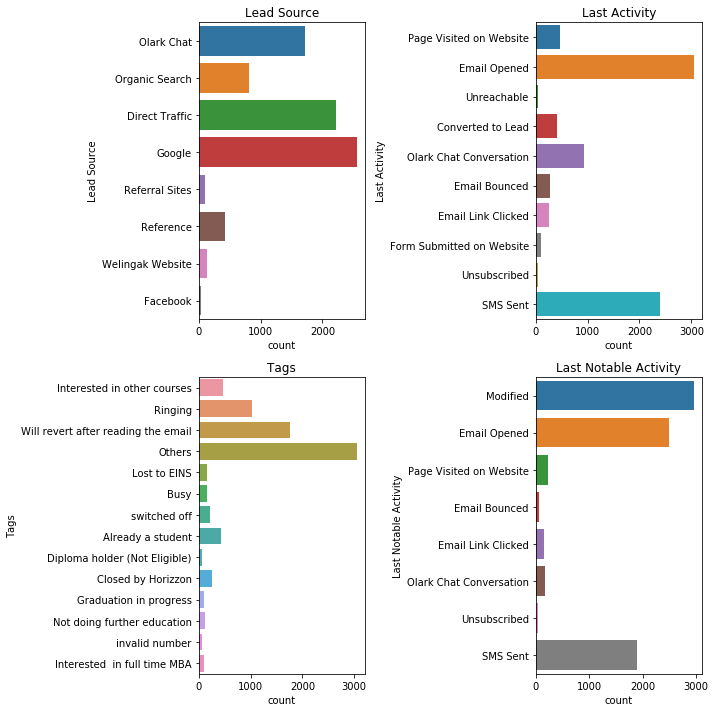

In [131]:
#checking the variables after removing redundant categorical levels
rc=['Lead Source','Last Activity','Tags','Last Notable Activity']
plt.figure(figsize=(10,10))
i=1
for col in rc:
    plt.subplot(2,2,i)
    sns.countplot(y=df[col])
    plt.title(col)
    i+=1
    
plt.tight_layout()
plt.show()

In [132]:
len(df)/ol*100

86.51515151515152

Thus, we observe that we still have 86.5% of the data with us. Hence, we can continue with our analysis.

# Data Preparation

In [133]:
#creating a copy of the dataframe so that we can use it later
df_original=df.copy()

In [134]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Tags,Lead Quality,A free copy of Mastering The Interview,Last Notable Activity
Lead Number,,,,,,,,,,,,,
660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Others,Interested in other courses,Low in Relevance,No,Modified
660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Others,Ringing,Others,No,Email Opened
660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Will revert after reading the email,Might be,Yes,Email Opened
660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Ringing,Not Sure,No,Modified
660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Others,Will revert after reading the email,Might be,No,Modified


#### Converting binary variables (Yes/No) to (1/0)

In [135]:
#list of binary variables

bv=['Do Not Email','A free copy of Mastering The Interview']

#mapping Yes to 1 and No to 0

def binary_mapping(x):
    return x.map({'Yes':1,'No':0})

#applying the function
df[bv]=df[bv].apply(binary_mapping)

In [136]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Tags,Lead Quality,A free copy of Mastering The Interview,Last Notable Activity
Lead Number,,,,,,,,,,,,,
660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Interested in other courses,Low in Relevance,0,Modified
660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Ringing,Others,0,Email Opened
660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Will revert after reading the email,Might be,1,Email Opened
660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Ringing,Not Sure,0,Modified
660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Others,Will revert after reading the email,Might be,0,Modified


We observe that all the Yes/No variables have been converted to 1/0.

#### Creating dummy variables for other categorical variables.

In [137]:
dv=['Lead Origin','Lead Source','Last Activity','Last Notable Activity','Specialization','Tags','Lead Quality']

#creating dummy variables

#Lead Origin
d=pd.get_dummies(df['Lead Origin'],prefix='Lead Origin',drop_first=True)

df=pd.concat([df,d],axis=1)

#Lead Source
d=pd.get_dummies(df['Lead Source'],prefix='Lead Source',drop_first=True)

df=pd.concat([df,d],axis=1)

#Last Activity
d=pd.get_dummies(df['Last Activity'],prefix='Last Activity',drop_first=True)

df=pd.concat([df,d],axis=1)

#Last Notable Activity
d=pd.get_dummies(df['Last Notable Activity'],prefix='Last Notable Activity',drop_first=True)

df=pd.concat([df,d],axis=1)


#Specialization
d=pd.get_dummies(df['Specialization'],prefix='Specialization')
d=d.drop('Specialization_Others',axis=1)
df=pd.concat([df,d],axis=1)

#Tags
d=pd.get_dummies(df['Tags'],prefix='Tags')
d=d.drop('Tags_Others',axis=1)
df=pd.concat([df,d],axis=1)

#Lead Quality
d=pd.get_dummies(df['Lead Quality'],prefix='Lead Quality')
d=d.drop('Lead Quality_Others',axis=1)
df=pd.concat([df,d],axis=1)

#dropping the original columns
df=df.drop(dv,axis=1)

In [138]:
df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,...,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Lead Quality_High in Relevance,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst
Lead Number,,,,,,,,,,,,,,,,,,,,,
660737,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
660728,0,0,5.0,674,2.5,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
660727,0,1,2.0,1532,2.0,1,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
660719,0,0,1.0,305,1.0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
660681,0,1,2.0,1428,1.0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0


Thus, we observe that the other categorical variables have been converted to one hot encoded dummy variables.

In [139]:
df.shape

(7994, 68)

### Train Test Split

In [140]:
from sklearn.model_selection import train_test_split

In [141]:
X=df.copy().drop('Converted',axis=1)
y=df['Converted']

In [142]:
#splitting the data into train and test set

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=42)

### Feature Scaling

In [143]:
from sklearn.preprocessing import StandardScaler

In [144]:
scaler=StandardScaler()

#scaling continuous variables

numvar=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

X_train[numvar]=scaler.fit_transform(X_train[numvar])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Lead Quality_High in Relevance,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst
Lead Number,,,,,,,,,,,,,,,,,,,,,
603178,0,1.035689,1.192311,0.363231,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
616347,0,0.160294,-0.143545,0.689712,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
647084,0,-0.277404,-0.469591,0.036750,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
581135,0,-0.277404,1.652501,0.036750,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
614480,0,-0.277404,2.274782,0.036750,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [247]:
round(X_train['TotalVisits'].mean())

0

In [146]:
### Checking the Conversion Rate

cr=df['Converted'].sum()/len(df)*100
cr

37.72829622216663

We have almost 38% conversion rate.

In [147]:
import statsmodels.api as sm

# Feature Selection using RFE

In [148]:
from sklearn.linear_model import LogisticRegression

In [149]:
logreg=LogisticRegression()

In [150]:
from sklearn.feature_selection import RFE

In [151]:
rfe=RFE(logreg,20)
rfe=rfe.fit(X_train,y_train)

In [152]:
rfe.support_

array([ True, False,  True, False, False, False,  True, False, False,
       False,  True, False, False, False,  True, False, False, False,
       False,  True, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False,  True])

In [153]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 20),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 21),
 ('A free copy of Mastering The Interview', False, 22),
 ('Lead Origin_Landing Page Submission', False, 9),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 11),
 ('Lead Source_Facebook', False, 47),
 ('Lead Source_Google', False, 45),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 42),
 ('Lead Source_Reference', False, 46),
 ('Lead Source_Referral Sites', False, 44),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 29),
 ('Last Activity_Email Link Clicked', False, 24),
 ('Last Activity_Email Opened', False, 25),
 ('Last Activity_Form Submitted on Website', False, 18),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Page Visited on Website', False, 34),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unreachable', False, 38),
 ('L

In [154]:
col=X_train.columns[rfe.support_]

In [155]:
len(col)

20

***Assessing the model with statsmodels***

In [156]:
import statsmodels.api as sm

In [157]:
X_train_sm = sm.add_constant(X_train[col])
m1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = m1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5595
Model:                            GLM   Df Residuals:                     5574
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1091.7
Date:                Sat, 30 Nov 2019   Deviance:                       2183.3
Time:                        19:33:06   Pearson chi2:                 7.75e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.1484      0.101    -21.276      0.000      -2.346      -1.950
Do Not Email                                -1.2206      0.259     -4.719      0.000      -1.728      -0.714
Total Time Spent on Website                  1.0166      0.065     15.755      0.000       0.890       1.143
Lead Origin_Lead Add Form                    1.9927      0.449      4.440      0.000       1.113       2.872
Lead Source_Olark Chat                       1.3706      0.159      8.637      0.000       1.060       1.682
Lead Source_Welingak Website                 3.5570      0.857      4.152      0.000       1.878       5.236
Last Activity_Olark Chat Conversation       -1.5500      0.246     -6.291      0.000      -2.033      -1.067
Last Activity_SMS Sent                       0.4153      0.207      2.006      0.045       0.009       0.821
Last Notable Activity_SMS Sent               2.3080      0.225     10.273      0.000       1.868       2.748
Tags_Already a student                      -1.7771      0.624     -2.849      0.004      -3.000      -0.555
Tags_Closed by Horizzon                      5.2894      0.750      7.051      0.000       3.819       6.760
Tags_Diploma holder (Not Eligible)          -2.2157      1.083     -2.046      0.041      -4.339      -0.093
Tags_Interested in other courses            -1.7252      0.369     -4.669      0.000      -2.449      -1.001
Tags_Lost to EINS                            7.0844      1.158      6.116      0.000       4.814       9.355
Tags_Not doing further education            -1.7122      1.039     -1.648      0.099      -3.749       0.324
Tags_Ringing                                -3.5178      0.254    -13.862      0.000      -4.015      -3.020
Tags_Will revert after reading the email     4.3882      0.200     21.952      0.000       3.996       4.780
Tags_invalid number                        -23.5231   1.56e+04     -0.002      0.999   -3.07e+04    3.06e+04
Tags_switched off                           -3.8336      0.625     -6.134      0.000      -5.058      -2.609
Lead Quality_High in Relevance               1.0024      0.465      2.156      0.031       0.091       1.914
Lead Quality_Worst                          -2.8387      1.027     -2.764      0.006      -4.851      -0.826
============================================================================================================
"""

We drop **Tags_invalid number** since it has high p value.

In [158]:
col=col.drop('Tags_invalid number')

In [159]:
X_train_sm = sm.add_constant(X_train[col])
m2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = m2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5595
Model:                            GLM   Df Residuals:                     5575
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1104.1
Date:                Sat, 30 Nov 2019   Deviance:                       2208.2
Time:                        19:33:06   Pearson chi2:                 7.75e+03
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.1791      0.101    -21.612      0.000      -2.377      -1.981
Do Not Email                                -1.2361      0.256     -4.835      0.000      -1.737      -0.735
Total Time Spent on Website                  1.0242      0.064     15.960      0.000       0.898       1.150
Lead Origin_Lead Add Form                    2.0254      0.449      4.514      0.000       1.146       2.905
Lead Source_Olark Chat                       1.4012      0.158      8.874      0.000       1.092       1.711
Lead Source_Welingak Website                 3.5689      0.856      4.168      0.000       1.891       5.247
Last Activity_Olark Chat Conversation       -1.5524      0.247     -6.292      0.000      -2.036      -1.069
Last Activity_SMS Sent                       0.4273      0.207      2.065      0.039       0.022       0.833
Last Notable Activity_SMS Sent               2.2420      0.223     10.054      0.000       1.805       2.679
Tags_Already a student                      -1.7450      0.622     -2.805      0.005      -2.964      -0.526
Tags_Closed by Horizzon                      5.3156      0.751      7.080      0.000       3.844       6.787
Tags_Diploma holder (Not Eligible)          -2.1807      1.081     -2.017      0.044      -4.300      -0.061
Tags_Interested in other courses            -1.6963      0.369     -4.601      0.000      -2.419      -0.974
Tags_Lost to EINS                            7.1758      1.169      6.141      0.000       4.886       9.466
Tags_Not doing further education            -1.6650      1.038     -1.604      0.109      -3.699       0.369
Tags_Ringing                                -3.4526      0.252    -13.681      0.000      -3.947      -2.958
Tags_Will revert after reading the email     4.4165      0.200     22.106      0.000       4.025       4.808
Tags_switched off                           -3.7655      0.625     -6.027      0.000      -4.990      -2.541
Lead Quality_High in Relevance               1.0060      0.465      2.161      0.031       0.094       1.918
Lead Quality_Worst                          -2.9690      0.999     -2.972      0.003      -4.927      -1.011
============================================================================================================
"""

We drop **Tags_Not doing further education** since it has high p value.

In [160]:
col=col.drop('Tags_Not doing further education')

In [161]:
X_train_sm = sm.add_constant(X_train[col])
m3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = m3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5595
Model:                            GLM   Df Residuals:                     5576
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1106.2
Date:                Sat, 30 Nov 2019   Deviance:                       2212.4
Time:                        19:33:06   Pearson chi2:                 7.88e+03
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.1980      0.101    -21.844      0.000      -2.395      -2.001
Do Not Email                                -1.2613      0.254     -4.961      0.000      -1.760      -0.763
Total Time Spent on Website                  1.0280      0.064     16.024      0.000       0.902       1.154
Lead Origin_Lead Add Form                    2.0401      0.449      4.544      0.000       1.160       2.920
Lead Source_Olark Chat                       1.4155      0.158      8.965      0.000       1.106       1.725
Lead Source_Welingak Website                 3.5780      0.857      4.177      0.000       1.899       5.257
Last Activity_Olark Chat Conversation       -1.5510      0.247     -6.278      0.000      -2.035      -1.067
Last Activity_SMS Sent                       0.4271      0.207      2.067      0.039       0.022       0.832
Last Notable Activity_SMS Sent               2.2514      0.223     10.108      0.000       1.815       2.688
Tags_Already a student                      -1.7112      0.620     -2.761      0.006      -2.926      -0.497
Tags_Closed by Horizzon                      5.3445      0.753      7.101      0.000       3.869       6.820
Tags_Diploma holder (Not Eligible)          -2.1622      1.081     -2.000      0.046      -4.281      -0.043
Tags_Interested in other courses            -1.6827      0.369     -4.561      0.000      -2.406      -0.960
Tags_Lost to EINS                            7.3078      1.183      6.175      0.000       4.988       9.627
Tags_Ringing                                -3.4465      0.252    -13.651      0.000      -3.941      -2.952
Tags_Will revert after reading the email     4.4331      0.200     22.190      0.000       4.042       4.825
Tags_switched off                           -3.7573      0.625     -6.009      0.000      -4.983      -2.532
Lead Quality_High in Relevance               1.0068      0.466      2.160      0.031       0.093       1.920
Lead Quality_Worst                          -3.1807      0.955     -3.329      0.001      -5.053      -1.308
============================================================================================================
"""

We drop **Tags_Diploma holder (Not Eligible)** since it has a high (approximately 0.5) p value.

In [162]:
col=col.drop('Tags_Diploma holder (Not Eligible)')

In [163]:
X_train_sm = sm.add_constant(X_train[col])
m4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = m4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5595
Model:                            GLM   Df Residuals:                     5577
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1109.6
Date:                Sat, 30 Nov 2019   Deviance:                       2219.1
Time:                        19:33:06   Pearson chi2:                 7.93e+03
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.2175      0.100    -22.093      0.000      -2.414      -2.021
Do Not Email                                -1.2793      0.256     -5.001      0.000      -1.781      -0.778
Total Time Spent on Website                  1.0193      0.064     15.973      0.000       0.894       1.144
Lead Origin_Lead Add Form                    2.0358      0.449      4.536      0.000       1.156       2.915
Lead Source_Olark Chat                       1.4163      0.158      8.980      0.000       1.107       1.725
Lead Source_Welingak Website                 3.5922      0.857      4.194      0.000       1.913       5.271
Last Activity_Olark Chat Conversation       -1.5415      0.247     -6.238      0.000      -2.026      -1.057
Last Activity_SMS Sent                       0.4455      0.206      2.159      0.031       0.041       0.850
Last Notable Activity_SMS Sent               2.2456      0.222     10.098      0.000       1.810       2.682
Tags_Already a student                      -1.6827      0.619     -2.720      0.007      -2.895      -0.470
Tags_Closed by Horizzon                      5.3641      0.753      7.125      0.000       3.889       6.840
Tags_Interested in other courses            -1.6609      0.369     -4.504      0.000      -2.384      -0.938
Tags_Lost to EINS                            7.3561      1.188      6.192      0.000       5.028       9.684
Tags_Ringing                                -3.4319      0.252    -13.608      0.000      -3.926      -2.938
Tags_Will revert after reading the email     4.4502      0.200     22.289      0.000       4.059       4.842
Tags_switched off                           -3.7423      0.625     -5.988      0.000      -4.967      -2.517
Lead Quality_High in Relevance               1.0096      0.466      2.164      0.030       0.095       1.924
Lead Quality_Worst                          -3.2355      0.947     -3.418      0.001      -5.091      -1.380
============================================================================================================
"""

In [164]:
#making predictions
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred

array([0.1489517 , 0.04292037, 0.01238401, ..., 0.96168176, 0.0018806 ,
       0.98274945])

***Creating a DataFrame with the predicted probabilities***

In [165]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number
0,0,0.148952,603178
1,0,0.042920,616347
2,0,0.012384,647084
3,1,0.478129,581135
4,1,0.999285,614480


In [166]:
y_train_pred_final['Converted_Prob'].describe()

count    5595.000000
mean        0.373012
std         0.420468
min         0.000023
25%         0.022916
50%         0.103166
75%         0.939693
max         0.999982
Name: Converted_Prob, dtype: float64

***Creating New Column 'predicted' with values equal to 1 if Converted_Prob>0.5 else 0***

In [167]:
y_train_pred_final['predicted']=y_train_pred_final['Converted_Prob'].map(lambda x:1 if x>0.5 else 0)

In [168]:
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted
0,0,0.148952,603178,0
1,0,0.042920,616347,0
2,0,0.012384,647084,0
3,1,0.478129,581135,0
4,1,0.999285,614480,1


***Checking Accuracy Score***

In [169]:
from sklearn import metrics

In [170]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final.predicted)
print(confusion)

[[3380  128]
 [ 275 1812]]


In [171]:
#defining a function to calculate the confusion matrix
def auc(df):
    a=metrics.accuracy_score(df['Converted'], df['predicted'])
    return a

auc(y_train_pred_final)

0.9279714030384272

***Defining a function to check VIF***

In [172]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [173]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
def vif(col):
    vif = pd.DataFrame()
    vif['Features'] = X_train[col].columns
    vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [174]:
vif(col)

,Features,VIF
6,Last Activity_SMS Sent,5.00
7,Last Notable Activity_SMS Sent,5.00
2,Lead Origin_Lead Add Form,1.92
13,Tags_Will revert after reading the email,1.74
3,Lead Source_Olark Chat,1.70
16,Lead Quality_Worst,1.63
8,Tags_Already a student,1.58
1,Total Time Spent on Website,1.46
5,Last Activity_Olark Chat Conversation,1.41
4,Lead Source_Welingak Website,1.37


We drop **Last Activity_SMS Sent** since it has a high VIF value.

In [175]:
col=col.drop('Last Activity_SMS Sent')

In [176]:
X_train_sm = sm.add_constant(X_train[col])
m5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = m5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5595
Model:                            GLM   Df Residuals:                     5578
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1111.8
Date:                Sat, 30 Nov 2019   Deviance:                       2223.6
Time:                        19:33:07   Pearson chi2:                 7.84e+03
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.1528      0.095    -22.756      0.000      -2.338      -1.967
Do Not Email                                -1.2671      0.254     -4.985      0.000      -1.765      -0.769
Total Time Spent on Website                  1.0195      0.064     15.977      0.000       0.894       1.145
Lead Origin_Lead Add Form                    2.0549      0.446      4.612      0.000       1.182       2.928
Lead Source_Olark Chat                       1.3914      0.157      8.878      0.000       1.084       1.699
Lead Source_Welingak Website                 3.5901      0.857      4.191      0.000       1.911       5.269
Last Activity_Olark Chat Conversation       -1.5829      0.246     -6.441      0.000      -2.065      -1.101
Last Notable Activity_SMS Sent               2.6318      0.136     19.355      0.000       2.365       2.898
Tags_Already a student                      -1.7325      0.618     -2.802      0.005      -2.944      -0.521
Tags_Closed by Horizzon                      5.3600      0.759      7.065      0.000       3.873       6.847
Tags_Interested in other courses            -1.6901      0.368     -4.594      0.000      -2.411      -0.969
Tags_Lost to EINS                            7.3047      1.170      6.242      0.000       5.011       9.599
Tags_Ringing                                -3.4349      0.252    -13.617      0.000      -3.929      -2.941
Tags_Will revert after reading the email     4.4285      0.199     22.264      0.000       4.039       4.818
Tags_switched off                           -3.7408      0.625     -5.989      0.000      -4.965      -2.517
Lead Quality_High in Relevance               1.0031      0.466      2.151      0.031       0.089       1.917
Lead Quality_Worst                          -3.2060      0.921     -3.480      0.001      -5.012      -1.400
============================================================================================================
"""

In [177]:
vif(col)

,Features,VIF
2,Lead Origin_Lead Add Form,1.92
12,Tags_Will revert after reading the email,1.73
3,Lead Source_Olark Chat,1.69
15,Lead Quality_Worst,1.63
7,Tags_Already a student,1.58
6,Last Notable Activity_SMS Sent,1.51
1,Total Time Spent on Website,1.46
5,Last Activity_Olark Chat Conversation,1.41
4,Lead Source_Welingak Website,1.37
14,Lead Quality_High in Relevance,1.36


This model does not have high p-value or high VIF value. Hence, we proceed with model (final) m5.

In [178]:
#making predictions on the training set
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred

array([0.14926697, 0.04301146, 0.0125664 , ..., 0.94241151, 0.0019996 ,
       0.98346835])

In [179]:
y_train_pred_final['Converted_Prob']=y_train_pred

In [180]:
y_train_pred_final['Converted_Prob'].describe()

count    5595.000000
mean        0.373012
std         0.420335
min         0.000024
25%         0.022470
50%         0.101431
75%         0.939969
max         0.999982
Name: Converted_Prob, dtype: float64

In [181]:
#mapping the 'Converted_Prob' to 'predicted' with a cutoff of 0.5
y_train_pred_final['predicted']=y_train_pred_final['Converted_Prob'].map(lambda x:1 if x>0.5 else 0)

In [182]:
#checking accuracy score
metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.predicted)

0.9277926720285969

We have approximately 92.8% accuracy score. We now proceed with Model Evaluation.

## Model Evaluation

In [183]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [184]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8682319118351701

In [185]:
# Let us calculate specificity
TN / float(TN+FP)

0.9635119726339795

In [186]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.036488027366020526


In [187]:
# positive predictive value 
print (TP / float(TP+FP))

0.934020618556701


In [188]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9247606019151847


### Plotting the ROC curve

In [189]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

    return None

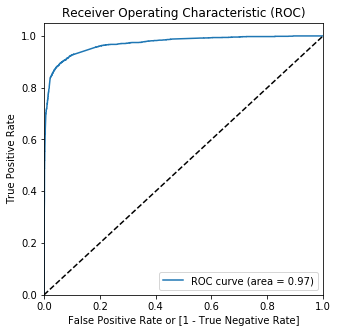

In [190]:
draw_roc(y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'])

As we can see, the curve is closer to the Top Left Border and covers 97% of the area, the model is good to proceed with.

### Finding the Optimal Cutoff Point

In [191]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.149267,603178,0,1,1,0,0,0,0,0,0,0,0
1,0,0.043011,616347,0,1,0,0,0,0,0,0,0,0,0
2,0,0.012566,647084,0,1,0,0,0,0,0,0,0,0,0
3,1,0.385077,581135,0,1,1,1,1,0,0,0,0,0,0
4,1,0.999274,614480,1,1,1,1,1,1,1,1,1,1,1


In [192]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.373012  1.000000  0.000000
0.1   0.1  0.845934  0.965980  0.774515
0.2   0.2  0.910813  0.923814  0.903079
0.3   0.3  0.917426  0.906564  0.923888
0.4   0.4  0.924933  0.890752  0.945268
0.5   0.5  0.927793  0.867274  0.963797
0.6   0.6  0.926363  0.849545  0.972064
0.7   0.7  0.925827  0.839483  0.977195
0.8   0.8  0.909741  0.785338  0.983751
0.9   0.9  0.888114  0.713464  0.992018


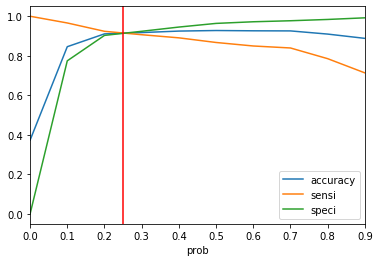

In [193]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.axvline(x=0.25,color='r')
plt.show()

From the above curve, the cutoff probability is 0.25.

In [194]:
y_train_pred_final['final_predicted'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.25 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.149267,603178,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.043011,616347,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.012566,647084,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.385077,581135,0,1,1,1,1,0,0,0,0,0,0,1
4,1,0.999274,614480,1,1,1,1,1,1,1,1,1,1,1,1


In [195]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final.final_predicted)

0.9149240393208221

In [196]:
confusion2 = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final.final_predicted )
confusion2

array([[3208,  300],
       [ 176, 1911]], dtype=int64)

In [197]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [198]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9156684235745088

In [199]:
# Let us calculate specificity
TN / float(TN+FP)

0.9144811858608894

In [200]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.08551881413911061


In [201]:
# Positive predictive value 
print (TP / float(TP+FP))

0.864314789687924


In [202]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9479905437352246


### Precision and Recall Curve (Precision Recall Tradeoff)

In [203]:
from sklearn.metrics import precision_recall_curve

In [204]:
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'])

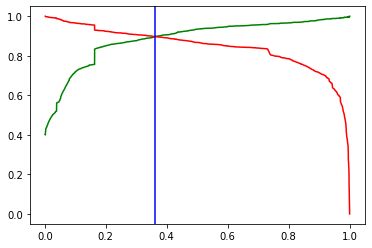

In [205]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.axvline(x=0.36,color='b')
plt.show()

The cutoff probability is at 0.36 according to the Precision Recall Curve.

In [206]:
#checking the metrics according to the Precision Recall curve
y_train_pred_final['predicted_pcr']=y_train_pred_final['Converted_Prob'].map(lambda x:1 if x>0.36 else 0)

In [207]:
#finding the confusion matrix
confusion_pcr=metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.predicted_pcr)

In [208]:
TP=confusion_pcr[1,1]
TN=confusion_pcr[0,0]
FP=confusion_pcr[0,1]
FN=confusion_pcr[1,0]

In [209]:
met=pd.DataFrame(index=['Training Set','Test Set'],columns=['Accuracy','Sensitivity','Specificity','Precision'])

In [210]:
#calculating accuracy

accu=metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.predicted_pcr)
met.loc['Training Set','Accuracy']=accu

#calculating Sensitivity

sensi=TP/float(TP+FN)
met.loc['Training Set','Sensitivity']=sensi

#calculating Specificity
speci=TN/float(TN+FP)
met.loc['Training Set','Specificity']=speci

#calculating Precision
prec=TP/float(TP+FP)
met.loc['Training Set','Precision']=prec

In [211]:
met

,Accuracy,Sensitivity,Specificity,Precision
Training Set,0.922967,0.89746,0.938141,0.896172
Test Set,NaN,NaN,NaN,NaN


Thus, we observe that all the metrics using the cutoff obtained from the Precision Recall Curve are good. We use the Precision Recall Curve cutoff on the test data since we want the Precision value to be as high as possible as we want to increase the Lead Conversion Rate.

### Making predictions on the test set

In [212]:
numvar

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [213]:
X_test[numvar] = scaler.transform(X_test[numvar])

In [214]:
X_test = X_test[col]

In [215]:
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,Last Notable Activity_SMS Sent,Tags_Already a student,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_High in Relevance,Lead Quality_Worst
Lead Number,,,,,,,,,,,,,,,,
601242,1,-0.855256,0,1,0,0,0,0,0,0,0,0,1,0,0,0
630804,0,2.038166,0,0,0,1,0,0,0,1,0,0,0,0,0,0
618850,0,-0.156587,0,0,0,0,0,0,0,0,0,0,0,1,0,0
597222,0,-0.855256,0,1,0,0,0,0,0,0,0,0,0,0,0,0
583104,0,-0.855256,0,1,0,0,1,0,0,0,0,0,1,0,0,0


In [216]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [217]:
y_test_pred = res.predict(X_test_sm)

In [218]:
y_test_pred[:10]

Lead Number
601242    0.821721
630804    0.033967
618850    0.002345
597222    0.163369
583104    0.995623
608164    0.244582
580914    0.000353
645524    0.976493
614796    0.163369
619626    0.079493
dtype: float64

In [219]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [220]:
y_pred_1.head()

,0
Lead Number,
601242,0.821721
630804,0.033967
618850,0.002345
597222,0.163369
583104,0.995623


In [221]:
# Convert y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [222]:
# Add CustID to imdex
y_test_df['Lead Number'] = y_test_df.index

In [223]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [224]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [225]:
y_pred_final.head()

,Converted,Lead Number,0
0,1,601242,0.821721
1,0,630804,0.033967
2,0,618850,0.002345
3,0,597222,0.163369
4,1,583104,0.995623


In [226]:
# Renaming the column 
y_pred_final = y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [227]:
# Rearranging the columns
#y_pred_final.reset_index(columns=['CustID','Converted','Converted_Prob'],axis=1) - Getting error

y_pred_final  = y_pred_final.reindex(columns=['Lead Number','Converted','Converted_Prob'])

In [228]:
y_pred_final.head()

,Lead Number,Converted,Converted_Prob
0,601242,1,0.821721
1,630804,0,0.033967
2,618850,0,0.002345
3,597222,0,0.163369
4,583104,1,0.995623


In [229]:
y_pred_final['final_predicted'] = y_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.36 else 0)


In [230]:
# Let's check the overall accuracy.
met.loc['Test Set','Accuracy']=metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

In [231]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1385,   85],
       [  88,  841]], dtype=int64)

In [232]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [233]:
# Let's see the sensitivity of our logistic regression model
met.loc['Test Set','Sensitivity']=TP / float(TP+FN)

In [234]:
# Let us calculate specificity
met.loc['Test Set','Specificity']=TN / float(TN+FP)

In [235]:
# Let us calculate the Precision
met.loc['Test Set','Precision']=TP/(TP+FP)

In [236]:
met

,Accuracy,Sensitivity,Specificity,Precision
Training Set,0.922967,0.89746,0.938141,0.896172
Test Set,0.927887,0.905274,0.942177,0.908207


We observe that all the metrics are similar for both Training and Test Set. Hence, our model is a good model.

In [237]:
#checking the variables in the model
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5595
Model:                            GLM   Df Residuals:                     5578
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1111.8
Date:                Sat, 30 Nov 2019   Deviance:                       2223.6
Time:                        19:33:08   Pearson chi2:                 7.84e+03
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.1528      0.095    -22.756      0.000      -2.338      -1.967
Do Not Email                                -1.2671      0.254     -4.985      0.000      -1.765      -0.769
Total Time Spent on Website                  1.0195      0.064     15.977      0.000       0.894       1.145
Lead Origin_Lead Add Form                    2.0549      0.446      4.612      0.000       1.182       2.928
Lead Source_Olark Chat                       1.3914      0.157      8.878      0.000       1.084       1.699
Lead Source_Welingak Website                 3.5901      0.857      4.191      0.000       1.911       5.269
Last Activity_Olark Chat Conversation       -1.5829      0.246     -6.441      0.000      -2.065      -1.101
Last Notable Activity_SMS Sent               2.6318      0.136     19.355      0.000       2.365       2.898
Tags_Already a student                      -1.7325      0.618     -2.802      0.005      -2.944      -0.521
Tags_Closed by Horizzon                      5.3600      0.759      7.065      0.000       3.873       6.847
Tags_Interested in other courses            -1.6901      0.368     -4.594      0.000      -2.411      -0.969
Tags_Lost to EINS                            7.3047      1.170      6.242      0.000       5.011       9.599
Tags_Ringing                                -3.4349      0.252    -13.617      0.000      -3.929      -2.941
Tags_Will revert after reading the email     4.4285      0.199     22.264      0.000       4.039       4.818
Tags_switched off                           -3.7408      0.625     -5.989      0.000      -4.965      -2.517
Lead Quality_High in Relevance               1.0031      0.466      2.151      0.031       0.089       1.917
Lead Quality_Worst                          -3.2060      0.921     -3.480      0.001      -5.012      -1.400
============================================================================================================
"""

Hence, the Top 3 variables that determine the conversion are:
- Tags
- Last Notable Activity
- Lead Source

<br>

*Note: We do not choose Lead Quality as the most important variable for now since it had a higher concentration of missing values. We can work on determining Lead Quality for all the observations in future since it acts as a important variable in our model.*

Top 3 dummy variables are:
- Tags_Lost to ENIS
- Tags_Closed by Horizzon
- Tags_Will revert after reading the email.

***Converting the probabilities to Lead Score.***

In [238]:
y_train_pred_final['Lead Score']=y_train_pred_final['Converted_Prob']*100

In [239]:
y_pred_final['Lead Score']=y_pred_final['Converted_Prob']*100

In [240]:
#concatenating vertically
lstr=y_train_pred_final.loc[:,['Lead Number','Lead Score']]
lste=y_pred_final.loc[:,['Lead Number','Lead Score']]

lead_score=pd.concat([lstr,lste])
lead_score

,Lead Number,Lead Score
0,603178,14.926697
1,616347,4.301146
2,647084,1.256640
3,581135,38.507739
4,614480,99.927360
...,...,...
2394,642126,9.835660
2395,594037,98.850541
2396,611906,3.855871
2397,607885,0.051177


Thus, we have assigned the Lead Score to each lead.

***Note that leads with Lead Score greater than 36 are more likely to convert.***

In [241]:
df_original.shape,lead_score.shape

((7994, 13), (7994, 2))

In [242]:
df_original=df_original.reset_index()

In [243]:
df_original=pd.merge(df_original,lead_score,on='Lead Number',how='inner')
df_original.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Tags,Lead Quality,A free copy of Mastering The Interview,Last Notable Activity,Lead Score
0,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Others,Interested in other courses,Low in Relevance,No,Modified,3.477563
1,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Others,Ringing,Others,No,Email Opened,0.559949
2,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Will revert after reading the email,Might be,Yes,Email Opened,98.679351
3,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Ringing,Not Sure,No,Modified,0.278591
4,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Others,Will revert after reading the email,Might be,No,Modified,98.395529


In [244]:
#mapping the Lead_Score to likelihood of conversion
df_original['likelihood']=df_original['Lead Score'].map(lambda x:'Likely to Convert' if x>36 else 'Not Likely to Convert')

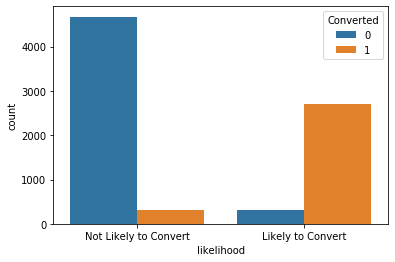

In [245]:
sns.countplot(x='likelihood',hue='Converted',data=df_original)

Hence, we observe that most of the observations which are more likely to convert actually convert. 

The 10 interns should call the leads with the following attributes:
- The Leads with the tag Lost to ENIS, Closed by Horizzon or Will revert after reading the email.
- The Leads whose source is Welingak Website or Olark Chat.
- The Leads whose origin is Lead Add Form
- The Leads who spend a higher amount of time on website.
- The Leads who have been assigned the High in Relevance Lead Quality

- The sales team should send emails to the leads who agreed for emails to be sent to them and SMS promotions should be done.
- The quality of the Olark Chat Conversation can be improved since it has a negative impact on the probability of conversion.
- The promotion on popular sources should be improved so that those sources can have a similar effect like Welingak Website.
- Lead Quality has a significant impact on conversion, but many leads have not been assigned any Lead Quality. Thus, the sales team should also assign the Lead Quality to as many leads as possible.
